# CNN for Autonomous Driving - Pedestrain Detection

#Import required packages:

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import os

## Keras
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

import pandas as pd
import random
import ntpath
from matplotlib.image import imread

## Sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


#Import data from Google drive:
Data consists of training and validatio datasets, each with pictures with pedestrians and pictures without pedestrians.

In [ ]:
data_directory = '/content/drive/MyDrive/Colab Notebooks/MGSC 673 Group Project/data'

In [ ]:
os.listdir(data_directory)

['validation', 'train', '.DS_Store']

In [ ]:
# Set a path for the Training and Validation directories
train_path=data_directory+'/train/'
validation_path=data_directory+'/validation/'

In [ ]:
os.listdir(train_path)

['.DS_Store', 'no pedestrian', 'pedestrian']

In [ ]:
os.listdir(validation_path)

['no pedestrian', 'pedestrian']

#Show example of pictures, one with a pedestrian and one without:

In [ ]:
os.listdir(train_path+'pedestrian')[9]

'pic_160.jpg'

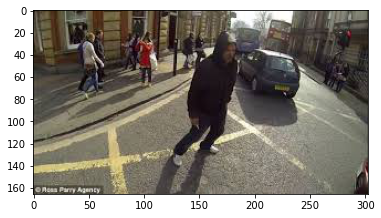

In [ ]:
# Print a picture with a pedestrian:
pedestrian=train_path+'pedestrian/'+'pic_160.jpg'
imread(pedestrian).shape
plt.imshow(imread(pedestrian))

In [ ]:
os.listdir(train_path+'no pedestrian')[9]

'train (399).jpg'

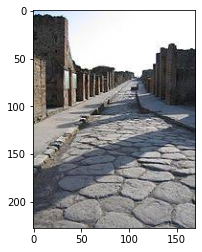

In [ ]:
# Print a picture without a pedestrian:
os.listdir(train_path+'no pedestrian')[5]
no_pedestrian=train_path+'no pedestrian/'+'train (399).jpg'
plt.imshow(imread(no_pedestrian))

# Preprocess the images to prepare them for the neural network:

We use the ImageDataGenerator function to augment the images in our training set. Augmenting image is the process of creating additional training data by generating more images that are slight variations (rotions, mirrors, etc.) of the images we already have. This process provides more images for our model to train on.

In [ ]:
image_gen=ImageDataGenerator(rescale=1/255,shear_range=0.1,zoom_range=0.1,fill_mode='nearest')

In [ ]:
image_gen.flow_from_directory(train_path)

Found 1262 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(validation_path)

Found 354 images belonging to 2 classes.


In [ ]:
# specify the shape of the input images:
image_shape=(200,200,3)

#Construct CNN Model:

In [ ]:

model=Sequential()
# Add convolution and pooling layer:
model.add(Convolution2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Add convolution and pooling layer:
model.add(Convolution2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Add convolution and pooling layer:
model.add(Convolution2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Add a flattening layer:
model.add(Flatten())
# Use dropout hyperperameter:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
# Compile the model:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

# Train CNN Model:

We set an early stopping rule so that the model stops training when validation loss stops improving, and we specfiy a batch size of 16 to determine how many image are passed through the network at a time. 

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)
batch_size=16

We use the flow_from_directory() function to pull the training and validation images that were generated in the preprocessing step by the ImageDataGenerator function from the training and validation file paths respectively.

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',
                                                batch_size=batch_size,class_mode='binary')

Found 1262 images belonging to 2 classes.


In [ ]:
val_image_gen = image_gen.flow_from_directory(validation_path,target_size=image_shape[:2],color_mode='rgb',
                                               batch_size=batch_size,class_mode='binary',shuffle=False)

Found 354 images belonging to 2 classes.


In [ ]:
results=model.fit_generator(train_image_gen,epochs=30,validation_data=val_image_gen,callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/15
79/79 [==============================] - 230s 3s/step - loss: 0.6781 - accuracy: 0.6038 - val_loss: 0.6092 - val_accuracy: 0.6525
Epoch 2/15
79/79 [==============================] - 23s 296ms/step - loss: 0.5428 - accuracy: 0.7544 - val_loss: 0.4865 - val_accuracy: 0.7684
Epoch 3/15
79/79 [==============================] - 21s 270ms/step - loss: 0.4370 - accuracy: 0.8003 - val_loss: 0.4606 - val_accuracy: 0.7966
Epoch 4/15
79/79 [==============================] - 22s 273ms/step - loss: 0.4018 - accuracy: 0.8233 - val_loss: 0.4160 - val_accuracy: 0.8051
Epoch 5/15
79/79 [==============================] - 21s 272ms/step - loss: 0.3613 - accuracy: 0.8407 - val_loss: 0.3695 - val_accuracy: 0.8446
Epoch 6/15
79/79 [==============================] - 22s 277ms/step - loss: 0.3205 - accuracy: 0.8621 - val_loss: 0.3327 - val_accuracy: 0.8672
Epoch 7/15
79/79 [==============================] - 21s 268ms/step - loss: 0.2867 - accuracy: 0.8764 - val_loss: 0.3582 - val_accuracy: 0.8559
E

# Plot the performance metrics for the Model:

[]

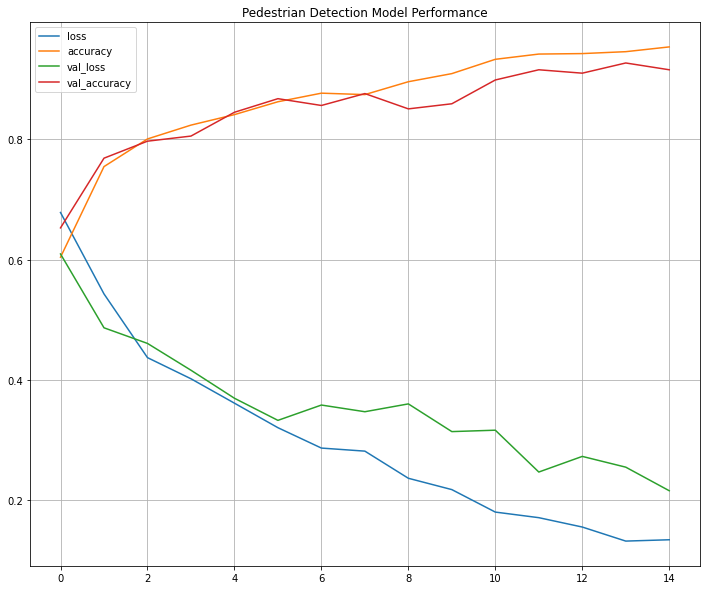

In [ ]:
losses=pd.DataFrame(model.history.history).plot(figsize=(12,10))
plt.grid(True)
plt.title("Pedestrian Detection Model Performance")
losses.plot()

# Evaluate the the results of our model:

In [ ]:
pred=model.predict_generator(val_image_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
pred[:5]

array([[0.11241564],
       [0.00171515],
       [0.0013581 ],
       [0.23560172],
       [0.01545159]], dtype=float32)

In [ ]:
predictions=pred>0.5
predictions[:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

### Show the classification report and confusion matrix for our Model:

In [ ]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       177
           1       0.92      0.90      0.91       177

    accuracy                           0.91       354
   macro avg       0.91      0.91      0.91       354
weighted avg       0.91      0.91      0.91       354



In [ ]:
confusion_matrix(val_image_gen.classes,predictions)

array([[163,  14],
       [ 18, 159]])